## Tidy vs Messy data

> Long format (Tidy data) has become the standard for science and business because such data tables can easily be turned into graphs, analysis and insights. In a Tidy, or Long format data table, all the values from the same variable are in the same column, even if they were measured on different subjects or conditions. Each row therefore represents a single observation of all variables.
* Most important rules when creating datasets:
* * Columns = attributes (features, variables)
* * Rows = observations (samples)
* * Cells = values (one observation of one feature)
* All other data is called messy data
* A very good paper on tidy data: https://vita.had.co.nz/papers/tidy-data.pdf


## Data Tidying steps

* If features are distributed in multiple tables - merge the tables into one, add new columns if neccessary
* Ensure that you've read the dataset correctly &rarr; Show the first 5 values (use ```data.head(5)```) 
* Check if the table header contains values &rarr; Add missing comlumn names (from the documentation)
* Compare the number of variables and observations (```data.shape```) with the description/documentation 
* If a feature is distributed in multiple columns &rarr; Melt the columns that represent one and the same feature
* If multiple variables are stored in one column &rarr; Identify and split the variables into separate columns
* Treat missing values (nulls & NaNs): either remove them or replace them 
* Reindex if neccessary
* Subset variables and observations
* Summarize and group variables 

> ```Unpivoting``` is useful when you have a dataset in a ```wide``` format that you are looking to convert to a ```long``` format. Practically, this means that you have columns where you want to maintain their values, but turn them into rows. This is known as a ```melt``` in Pandas.

> In the context of the Pandas library in Python, ```pivoting``` is a neat process that transforms a DataFrame into a new one by converting selected columns into new columns based on their values.

## Operations on Datasets - Basic tools

<a href="https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf">Pandas cheat sheet</a>

#### Subsetting Rows (selection)

* First / last n records (observations):<br>
``` data.head(10)```<br>
``` data.tail() # 5 by default ```
* Random n records:<br>
``` data.sample(n = 10) ```<br> 
``` data.sample() # 1 random record by default ``` 
* Smallest / largest n records in a given column:<br>
``` data.nsmallest(n, "col_name") ```<br> 
``` data.nlargest(n, "col_name") ``` 
* Subsetting by a Boolean expression (predicate):<br>
* * Returns only rows where the expression returns True <br>
``` data[data.col_name > 30] ``` 

#### Subsetting Columns (projection)

* Single column (returns a ```Series``` object):<br>
``` data["col_name"] ``` <br>
``` data.col_name # Possible in most cases ``` 
* More than one column (returns a DataFrame object):<br>
``` data[["col_name1", "col_name2"]] ``` 
* Combining filters:<br>
``` data[data.col_name1 > "2010-10-01"][["col_name1", "col_name2"]] ```<br> 
``` data.loc[data.col_name > "2010-10-01", ["col_name1", "col_name2"]] ``` 
* A note on Boolean expressions: <br>
* * "and", "or", "not" are &, |, ~
* * Always put parentheses around the individual expressions:<br> 
``` data[(data.col_name > "2010-10-01") & (data.col_name < "2010-12-01")]```

#### Summary Statistics and Grouping

* These methods work by columns. If multiple columns are passed, they are applied to each column individually:<br>
``` data.col_name.count() # number of non-null values``` <br>
``` data.col_name.min()```<br> 
``` data.col_name.max()``` <br>
``` data.col_name.mean()``` <br>
``` data.tcol_namemin.median()``` <br>
``` data.col_name.std()``` 
* Summarize (describe) entire dataset: <br>
``` data.describe()``` 
* Grouping:
* * Splits the data into several groups based on the values of a column
* * Apply a method after grouping or iterate over the groups (using a for-loop):<br>
``` data.groupby("col_name").mean()``` 

#### Further transformations

* If needed, perform math operations: log, square root, addition, multiplication, etc.
* * Be careful as you'll get results in different dimensions
* Normalizing scores (such as using Z-scores) is recommended in most cases
* * It's much better for ML algorithms to have data of similar scales
* * You can do that manually or use a library (such as sklearn.preprocessing)
* By convention, calculated columns are added to the dataset

#### Describe all operations as you're doing them

* Describe what you're doing and why
* * Useful to check your work later (or allow others to do that)
* * If needed, save the resulting dataset into a file
* * Supply your data transformation log 
* * Provide a dataset description

#### Outliers and Errors 

* Outliers – values which are far from their expected range or having a very low probability of happening (assuming a model)
* Many possible cases
* * Wrong data entry (e.g. an adult weighing 5kg might be 50kg or something else)
* *  Wrong assumptions (the data is correct, our view isn't)
* What to do?
* * Inspect the data point and try to figure out what happened
* * If needed, remove the row or try to replace the value
* * Try a transformation
* * If possible, perform analysis with and without the outlier(s) and compare your results

##### Transformations on Features
 
* The quality of our results depends strongly on the features we use ("Garbage in – garbage out")
* Dimensionality reduction - Reducing the number of variables (features)
* * We can do this manually or use algorithms
* * Feature selection - Selecting only columns that are useful
* * Feature extraction - Getting meaningful features after transformation of raw data (such as non-structured to structured data) 
* Feature engineering - Using our knowledge of the data to create meaningful features (involves a lot of testing)

## Examples 

#### I

In [37]:
import pandas as pd

tb_data = pd.read_csv("data/2.2_tb.csv")
tb_data

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [38]:
# Melt the values
tb_data = pd.melt(tb_data, id_vars = ["iso2","year"], var_name = "sex_and_age", value_name = "cases")
print("sex_and_age.unique() : ", tb_data["sex_and_age"].unique())
tb_data

sex_and_age.unique() :  ['m04' 'm514' 'm014' 'm1524' 'm2534' 'm3544' 'm4554' 'm5564' 'm65' 'mu'
 'f04' 'f514' 'f014' 'f1524' 'f2534' 'f3544' 'f4554' 'f5564' 'f65' 'fu']


,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN
...,...,...,...,...
115375,ZW,2004,fu,NaN
115376,ZW,2005,fu,NaN
115377,ZW,2006,fu,NaN
115378,ZW,2007,fu,NaN


In [39]:
# Separate the columns 
parts = tb_data["sex_and_age"].str.extract("(\D)(\d+)(\d{2})", expand = True)
parts.columns = ["sex", "age_lower", "age_upper"]
parts["age"] = parts["age_lower"] + "-" + parts["age_upper"]
parts[parts[["sex", "age_lower", "age_upper", "age"]].notnull().all(1)]

,sex,age_lower,age_upper,age
5769,m,5,14,5-14
5770,m,5,14,5-14
5771,m,5,14,5-14
5772,m,5,14,5-14
5773,m,5,14,5-14
...,...,...,...,...
103837,f,55,64,55-64
103838,f,55,64,55-64
103839,f,55,64,55-64
103840,f,55,64,55-64


In [40]:
# Merge back
tb_data = pd.concat([tb_data, parts], axis = 1)
tb_data = tb_data.drop(["sex_and_age", "age_lower", "age_upper"], axis = 1)
tb_data

,iso2,year,cases,sex,age
0,AD,1989,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN
...,...,...,...,...,...
115375,ZW,2004,NaN,NaN,NaN
115376,ZW,2005,NaN,NaN,NaN
115377,ZW,2006,NaN,NaN,NaN
115378,ZW,2007,NaN,NaN,NaN


In [41]:
# Remove missing values and sort them
tb_data = tb_data.dropna()
tb_data = tb_data.sort_values(by = ["iso2", "year", "sex", "age", "cases"])
tb_data

,iso2,year,cases,sex,age
69234,AD,1996,0.0,f,0-14
75003,AD,1996,1.0,f,15-24
80772,AD,1996,1.0,f,25-34
86541,AD,1996,0.0,f,35-44
92310,AD,1996,0.0,f,45-54
...,...,...,...,...,...
23075,ZW,2008,614.0,m,15-24
28844,ZW,2008,0.0,m,25-34
34613,ZW,2008,3316.0,m,35-44
40382,ZW,2008,704.0,m,45-54


In [43]:
# The index is now wrong, reindex to make it better
tb_data = tb_data.reset_index()
del tb_data["index"]
tb_data

,level_0,iso2,year,cases,sex,age
0,0,AD,1996,0.0,f,0-14
1,1,AD,1996,1.0,f,15-24
2,2,AD,1996,1.0,f,25-34
3,3,AD,1996,0.0,f,35-44
4,4,AD,1996,0.0,f,45-54
...,...,...,...,...,...,...
29443,29443,ZW,2008,614.0,m,15-24
29444,29444,ZW,2008,0.0,m,25-34
29445,29445,ZW,2008,3316.0,m,35-44
29446,29446,ZW,2008,704.0,m,45-54


#### II  

In [112]:
temp_data = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")
temp_data.head(10)

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
5,2012-3-15,79,69,58,61,58,53,90,69,48,...,10,10,10,31,10,41.0,0.04,3,Rain-Thunderstorm,209
6,2012-3-16,75,64,52,57,54,51,100,75,49,...,10,10,10,14,5,20.0,T,2,NaN,169
7,2012-3-17,78,62,46,60,54,46,100,78,56,...,10,5,0,12,5,17.0,T,3,Fog-Thunderstorm,162
8,2012-3-18,80,70,59,61,58,57,93,69,45,...,10,10,9,18,8,25.0,T,2,Rain,197
9,2012-3-19,84,72,59,58,56,50,90,66,42,...,10,10,10,17,6,23.0,0.00,1,NaN,165


In [113]:
# Check the data types (to see if something's wrong with the reading - e.g. numbers recognized as strings)
temp_data.dtypes

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [114]:
# Summarize (describe) the dataset
temp_data.describe()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,CloudCover,WindDirDegrees
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,366.000000,366.000000
mean,66.803279,55.683060,44.101093,49.549180,44.057377,37.980874,90.027322,67.860656,45.193989,30.108907,30.022705,29.936831,9.994536,8.732240,5.797814,16.418033,6.057377,22.764384,2.885246,189.704918
std,20.361247,18.436506,17.301141,16.397178,16.829996,17.479449,9.108438,9.945591,15.360261,0.172189,0.174112,0.182476,0.073821,1.875406,3.792219,5.564329,3.200940,8.131092,2.707261,94.045080
min,16.000000,11.000000,1.000000,0.000000,-3.000000,-5.000000,54.000000,37.000000,15.000000,29.640000,29.420000,29.230000,9.000000,2.000000,0.000000,6.000000,0.000000,7.000000,0.000000,1.000000
25%,51.000000,41.000000,30.000000,36.000000,30.000000,24.000000,85.000000,61.250000,35.000000,29.990000,29.910000,29.830000,10.000000,8.000000,2.000000,13.000000,4.000000,17.000000,0.000000,131.000000
50%,69.000000,59.000000,47.000000,54.500000,48.000000,41.000000,93.000000,68.000000,42.000000,30.100000,30.020000,29.940000,10.000000,10.000000,6.000000,16.000000,6.000000,22.000000,2.000000,192.500000
75%,84.000000,70.750000,57.750000,62.000000,57.000000,51.000000,96.000000,74.000000,54.000000,30.210000,30.127500,30.040000,10.000000,10.000000,10.000000,20.000000,8.000000,26.000000,5.000000,259.750000
max,106.000000,89.000000,77.000000,77.000000,72.000000,71.000000,100.000000,95.000000,90.000000,30.600000,30.480000,30.440000,10.000000,10.000000,10.000000,39.000000,19.000000,63.000000,8.000000,360.000000


In [115]:
# temp_data = temp_data.rename(columns=lambda x: x.strip()) # remove spaces from tnames, such as " Events"

# Make column names look more "pythonic" (lowercase_with_underscores). This will make selecting them easier.
temp_data.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
"mean_dew", "min_dew", "max_humidity", "mean_humidity",
"min_humidity", "max_pressure", "mean_pressure",
"min_pressure", "max_visibility", "mean_visibility",
"min_visibility", "max_wind", "mean_wind", "max_gusts",
"precipitation", "cloud_cover", "events", "wind_dir"]                                        

In [116]:
# Convert the dates to a datetime object
from datetime import datetime

def string_to_date(date_string):
    return datetime.strptime(date_string, "%Y-%m-%d")

temp_data.date = temp_data.date.apply(string_to_date)

# Use dates as indices (to subset date ranges or perform other time-dependent tasks) 
temp_data.index = temp_data.date

# Drop duplicate 'date' column
temp_data = temp_data.drop("date", axis = 1) 

# axis = 1 tells pandas to search for a column (axis = 0 -> row)
print(temp_data.loc[datetime(2012, 8, 19)]) # or temp_data.loc["2012-08-19"]

max_temp              82
mean_temp             67
min_temp              51
max_dew               56
mean_dew              50
min_dew               42
max_humidity          96
mean_humidity         62
min_humidity          28
max_pressure       29.95
mean_pressure      29.92
min_pressure       29.89
max_visibility        10
mean_visibility       10
min_visibility        10
max_wind              14
mean_wind              3
max_gusts           21.0
precipitation       0.00
cloud_cover            1
events               NaN
wind_dir               1
Name: 2012-08-19 00:00:00, dtype: object


In [117]:
# Convert the precipitation column in the dataset to floating point numbers
print("precipitation.unique() : \n", temp_data.precipitation.unique())

def precip_to_float(precip_str):
    if precip_str == 'T':
        return 1e-10 # a very small number
    return float(precip_str)

temp_data.precipitation = temp_data.precipitation.apply(precip_to_float)
print("precipitation.unique() after float converstoin: \n", temp_data.precipitation.unique())

precipitation.unique() : 
 ['0.00' 'T' '0.03' '0.04' '0.14' '0.86' '0.06' '0.01' '0.51' '0.69' '1.45'
 '0.38' '0.19' '0.15' '0.49' '0.29' '0.09' '0.90' '0.02' '0.07' '0.13'
 '0.10' '0.36' '0.27' '0.16' '0.26' '0.31' '0.05' '0.32' '1.85' '0.53'
 '2.00' '0.92' '1.10' '0.17' '1.13' '0.63' '0.50' '0.71' '0.73' '1.52'
 '0.47' '0.39' '0.18' '0.77' '0.08' '0.33' '0.44' '0.48' '0.20' '0.12'
 '0.82' '1.16' '1.73' '0.40' '0.99' '0.30' '1.17']
precipitation.unique() after float converstoin: 
 [0.00e+00 1.00e-10 3.00e-02 4.00e-02 1.40e-01 8.60e-01 6.00e-02 1.00e-02
 5.10e-01 6.90e-01 1.45e+00 3.80e-01 1.90e-01 1.50e-01 4.90e-01 2.90e-01
 9.00e-02 9.00e-01 2.00e-02 7.00e-02 1.30e-01 1.00e-01 3.60e-01 2.70e-01
 1.60e-01 2.60e-01 3.10e-01 5.00e-02 3.20e-01 1.85e+00 5.30e-01 2.00e+00
 9.20e-01 1.10e+00 1.70e-01 1.13e+00 6.30e-01 5.00e-01 7.10e-01 7.30e-01
 1.52e+00 4.70e-01 3.90e-01 1.80e-01 7.70e-01 8.00e-02 3.30e-01 4.40e-01
 4.80e-01 2.00e-01 1.20e-01 8.20e-01 1.16e+00 1.73e+00 4.00e-01 9.90e-01
 3

In [118]:
# Substitute NaN values in the events column with "". Substitution is a better choise than droping rows in this case, 
# because there are 204 missing values out of 366 rows in the "events" column
print("events.unique() : ", temp_data.events.unique())
temp_data.events = temp_data.events.fillna("")
temp_data.events.head(10)

events.unique() :  [nan 'Rain' 'Rain-Thunderstorm' 'Fog-Thunderstorm' 'Fog-Rain'
 'Thunderstorm' 'Fog-Rain-Thunderstorm' 'Fog' 'Fog-Rain-Snow'
 'Fog-Rain-Snow-Thunderstorm' 'Fog-Snow' 'Snow' 'Rain-Snow']


date
2012-03-10                     
2012-03-11                 Rain
2012-03-12                 Rain
2012-03-13                     
2012-03-14                     
2012-03-15    Rain-Thunderstorm
2012-03-16                     
2012-03-17     Fog-Thunderstorm
2012-03-18                 Rain
2012-03-19                     
Name: events, dtype: object

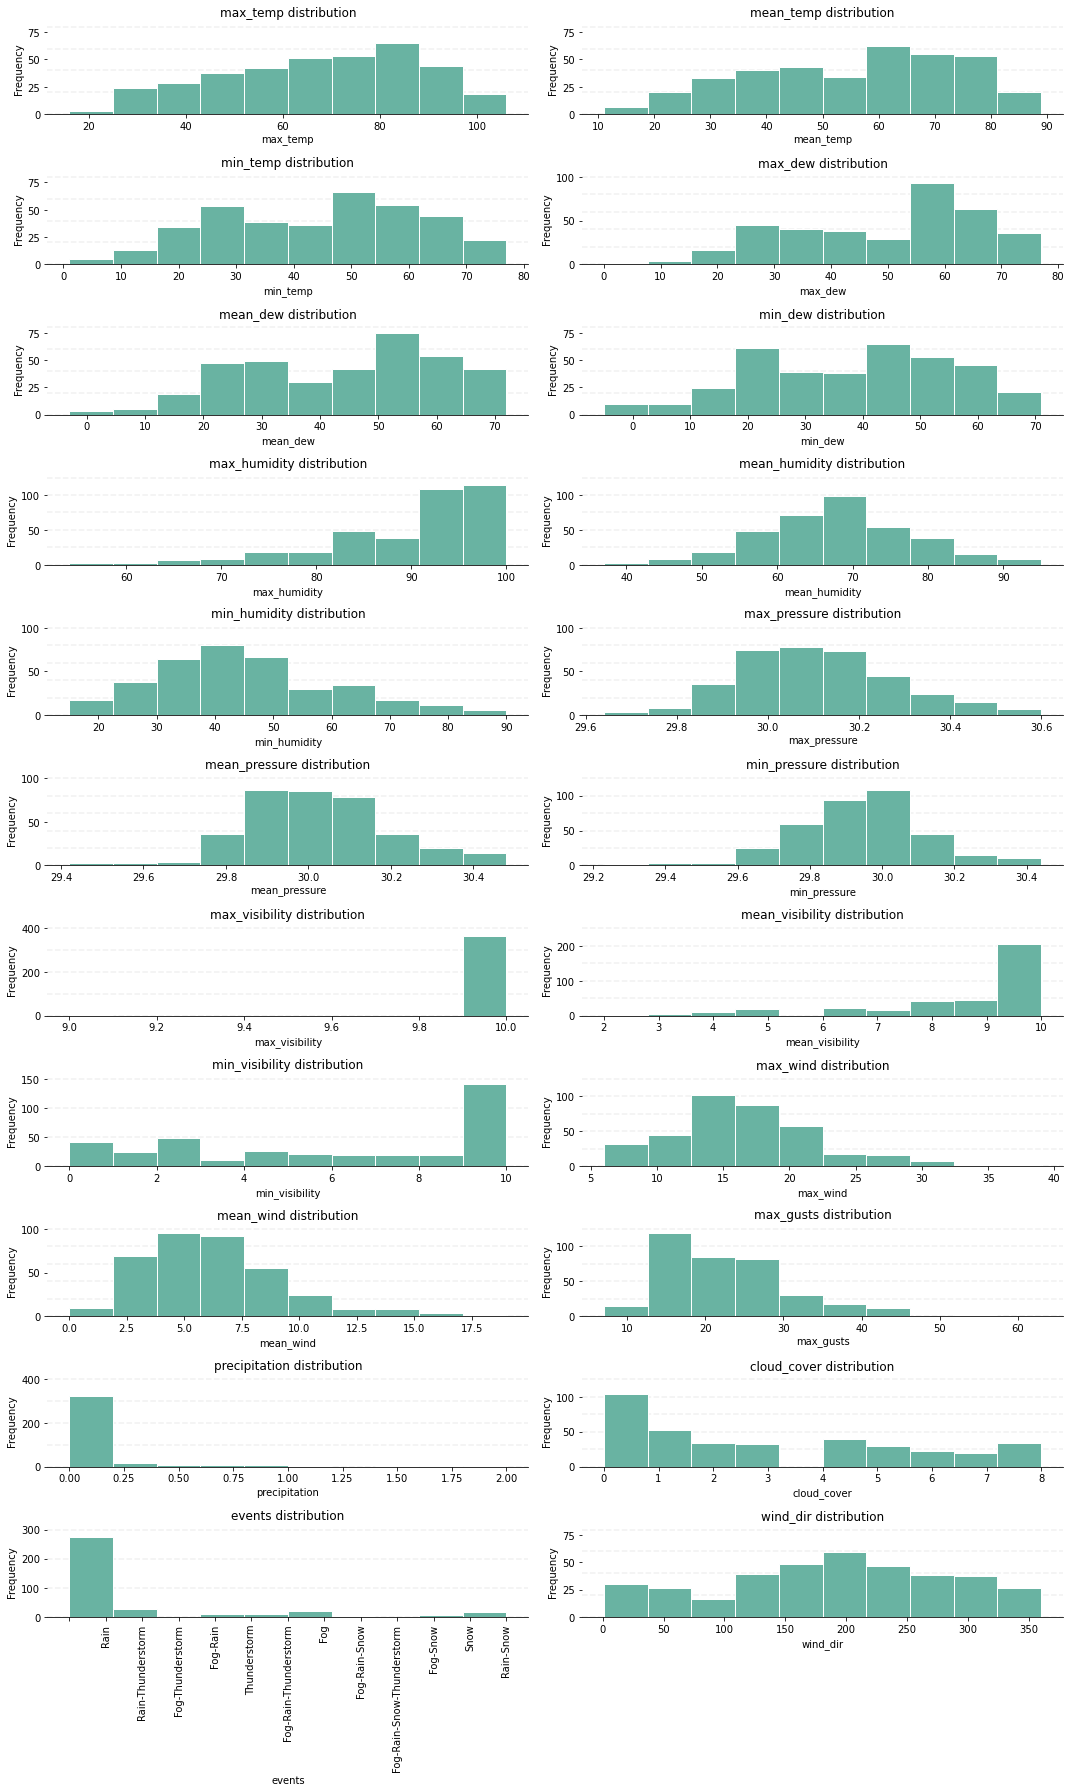

In [206]:
import matplotlib.pyplot as plt

# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(15, 25))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

#plt.xticks(rotation=25) 

# Loop through each column and plot a histogram
for i, column in enumerate(temp_data.columns):
    
    # Add the histogram
    temp_data[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2', # Color of the bins
                    grid=False,
                    zorder=2 
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 
    
    # Despine
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    
    # Draw horizontal axis lines
    vals = axes[i].get_yticks()
    for tick in vals:
        axes[i].axhline(y=tick, linestyle='dashed', alpha=0.8, color='#eeeeee', zorder=1)
    
    # Rotate axis tick labels    
    if column == 'events':
        axes[i].tick_params(axis='x', labelrotation=90)
        
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

